# 1. Introduction 

In this section the tables are joined and the data is normalized to look for more possible relationships.

In [45]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [46]:
public_records_df = pd.read_csv('Public_records_transformed.csv')
loan_performance_df = pd.read_csv('Loan_performance_transformed.csv')

# Perform an inner merge on the first column of both dataframes
merged_df = pd.merge(public_records_df, loan_performance_df, on=public_records_df.columns[0], how='inner')
data = merged_df.drop('Unnamed: 0', axis =1)
merged_df.head()

,analytics_matchkey,industry_code_kind_of_business,amount,equal_credit_opportunity_act_code,legislative_prohibited_code,public_record_type_code_1D,public_record_type_code_1F,public_record_type_code_1X,public_record_type_code_2D,public_record_type_code_2F,...,public_record_source_type_code_RD,public_record_source_type_code_SC,public_record_source_type_code_SU,number_bankruptcies,Unnamed: 0,max_loan_amount,late_30_days,late_60_days,late_90_days,no_late
0,1346754,1,1327.0,0,0,0,0,0,0,0,...,0,0,0,2,9,1025,0,0,0,1
1,1346756,1,406.0,1,0,0,0,0,0,0,...,1,0,0,2,11,2500,0,0,0,1
2,1346767,1,2210.0,0,0,0,0,0,0,0,...,0,0,0,2,22,1458,0,0,0,1
3,1346784,1,368.0,1,1,0,0,0,0,0,...,0,0,0,2,39,1500,0,0,0,1
4,1346816,1,6854.0,1,0,0,0,0,0,0,...,1,0,0,2,71,1690,0,0,0,1


In total there are 55 columns, one of them being the ID and 4 being the variable that you want to try to predict.

In [47]:
last_four_columns = data.columns[-4:]

# Combinar las últimas cuatro columnas en una sola columna 'target'
data['target'] = data[last_four_columns].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

# Eliminar las cuatro últimas columnas originales
data.drop(columns=last_four_columns, inplace=True)

# Crear un diccionario de mapeo para los valores de target
target_mapping = {
    '0_0_0_1': 'no_late',
    '0_0_1_0': 'late_90_days',
    '1_0_0_0': 'late_30_days',
    '0_1_0_0': 'late_60_days'
}

# Aplicar el mapeo a la columna 'target'
data['target'] = data['target'].map(target_mapping)


data.to_csv('Merged_tables.csv', index=False)

To facilitate operations, the target column is constructed where the possible categories to which each tuple can belong are stored.

# 2. Normalization

Numerical data are normalized to equalize their influence on the analyses.

In [48]:
df = pd.read_csv('Merged_tables.csv')
scaler = MinMaxScaler()
df[['amount', 'max_loan_amount', 'number_bankruptcies']] = scaler.fit_transform(df[['amount', 'max_loan_amount','number_bankruptcies']])

df.head()


,analytics_matchkey,industry_code_kind_of_business,amount,equal_credit_opportunity_act_code,legislative_prohibited_code,public_record_type_code_1D,public_record_type_code_1F,public_record_type_code_1X,public_record_type_code_2D,public_record_type_code_2F,...,public_record_source_type_code_JU,public_record_source_type_code_MA,public_record_source_type_code_MU,public_record_source_type_code_PC,public_record_source_type_code_RD,public_record_source_type_code_SC,public_record_source_type_code_SU,number_bankruptcies,max_loan_amount,target
0,1346754,1,0.000133,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.022222,0.008333,no_late
1,1346756,1,0.000041,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0.022222,0.500000,no_late
2,1346767,1,0.000221,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.022222,0.152667,no_late
3,1346784,1,0.000037,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.022222,0.166667,no_late
4,1346816,1,0.000685,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0.022222,0.230000,no_late


# 3. Correlation 

The study of correlation is important both to ensure a good response from linear models and to find new interesting characteristics in the data.

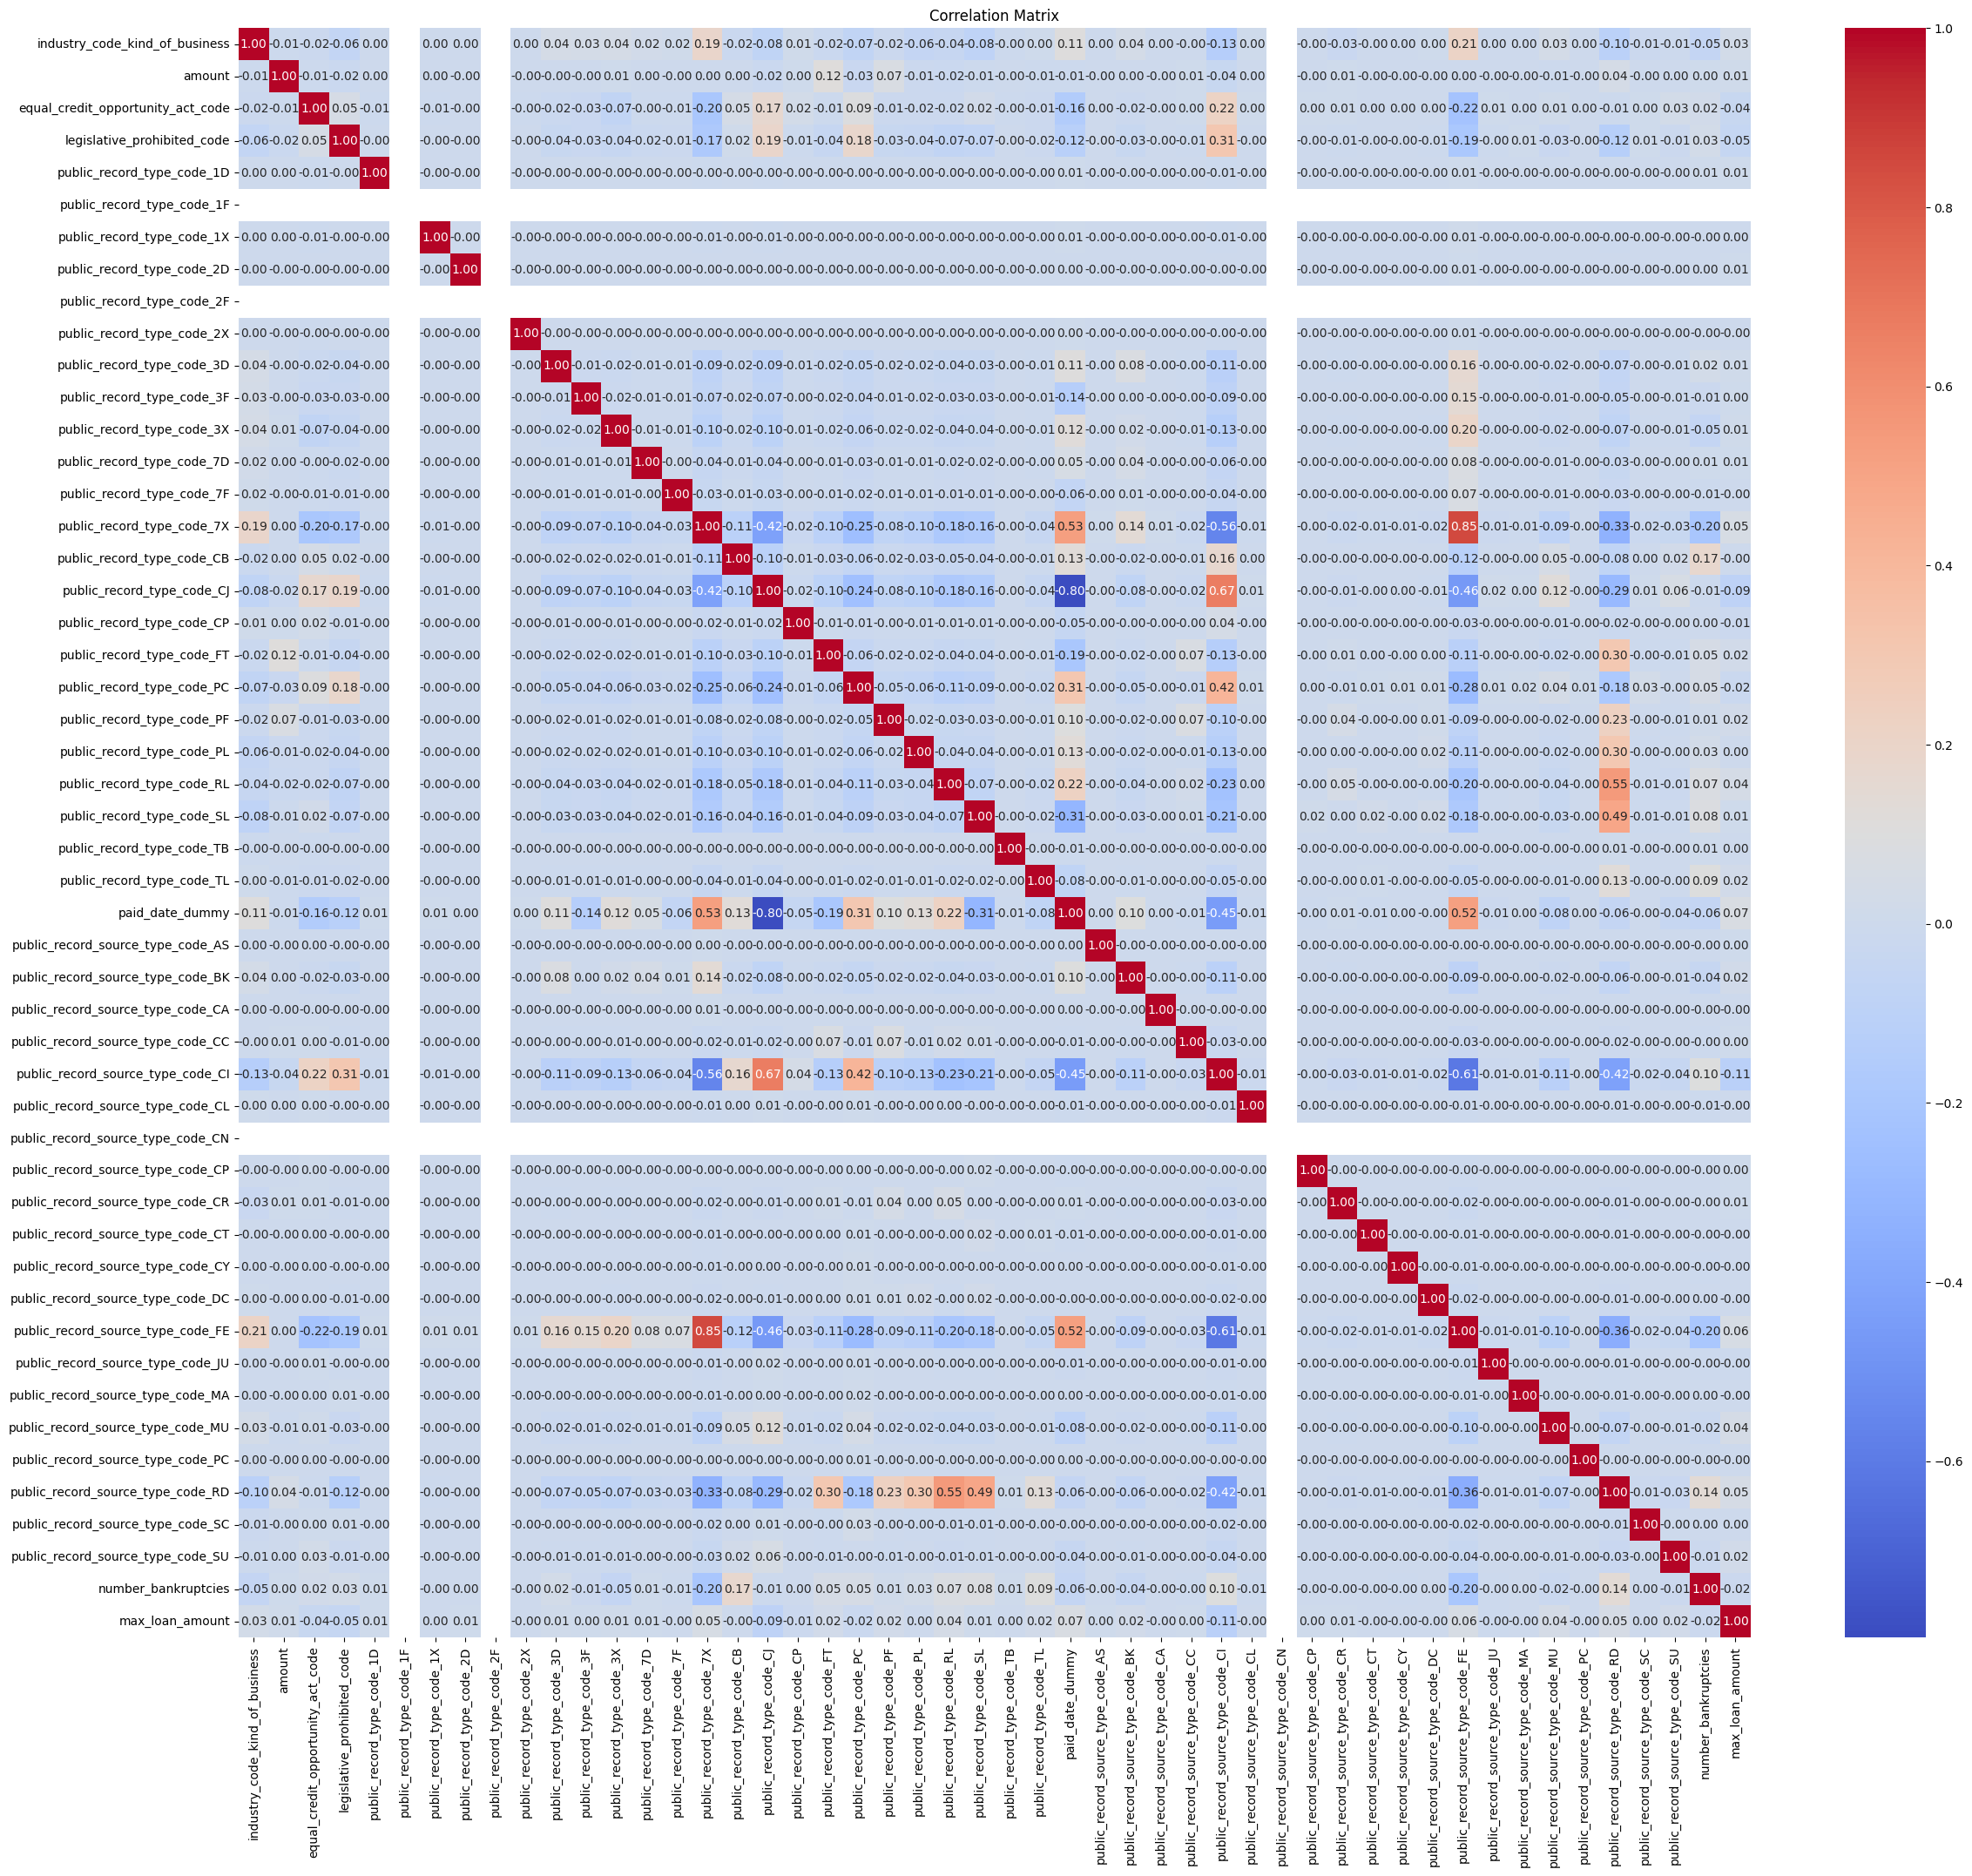

In [49]:
# Dropping the ID column and the target columns for the correlation study
columns_to_drop = ['analytics_matchkey', 'target']
correlation_df = df.drop(columns=columns_to_drop)

# Calculating the correlation matrix
corr_matrix = correlation_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(28, 24))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In general the correlation between dummy variables should be low as shown in the table.

Certain correlations can be observed, for example publict_record_source_type_code_FE has a strong positive correlation with public_record_type_code_7X. This is probably because there are courts specialized in certain types of cases.

That public_record_type_code_CJ has a very strong correlation with there being a payment date may mean that this type of document or judgment does not have a payment associated with it or that it is private.

You can also see that the public_record_type_code_1F column is only zeros, there is no data on it. So it can be deleted by not adding information.

# 4. Colineality 

Collinearity is a key factor when making linear models. The VIF is used to detect collinearity.

In [50]:
selected_columns = correlation_df.columns[:50]

# Adding a constant for VIF calculation
X_selected = correlation_df[selected_columns].assign(constant=1)

# Calculating VIF for each feature in the selected subset
vif_data_selected = pd.DataFrame({
    'Variable': X_selected.columns,
    'VIF': [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]
})

# Removing the constant column for display purposes
vif_data_selected = vif_data_selected[vif_data_selected['Variable'] != 'constant']

vif_data_selected.sort_values(by='VIF', ascending=False)


C:\Users\Cash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\Cash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Cash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Variable,VIF
25,public_record_type_code_TB,inf
36,public_record_source_type_code_CR,inf
23,public_record_type_code_RL,inf
47,public_record_source_type_code_SU,inf
26,public_record_type_code_TL,inf
31,public_record_source_type_code_CC,inf
32,public_record_source_type_code_CI,inf
33,public_record_source_type_code_CL,inf
35,public_record_source_type_code_CP,inf
37,public_record_source_type_code_CT,inf


Values ​​appear with very high levels of collinearity. Most likely due to the fact of dummy variables. When a model has to be built, this problem must be solved either using models that are not greatly affected by collinearity or with statistical techniques such as PCA or MCA.

# 5. PCA analysis 

PCA is a very useful tool to reduce collinearity and to understand the data more, however, it has limitations, the first is that it is quite sensitive to outliers or errors in the data. The second is that some interpretability of the data is lost, although it can always be reversed and recovered. Finally, since this dataset is mainly made up of categorical variables, certain statistical techniques such as MCA could be more meaningful.

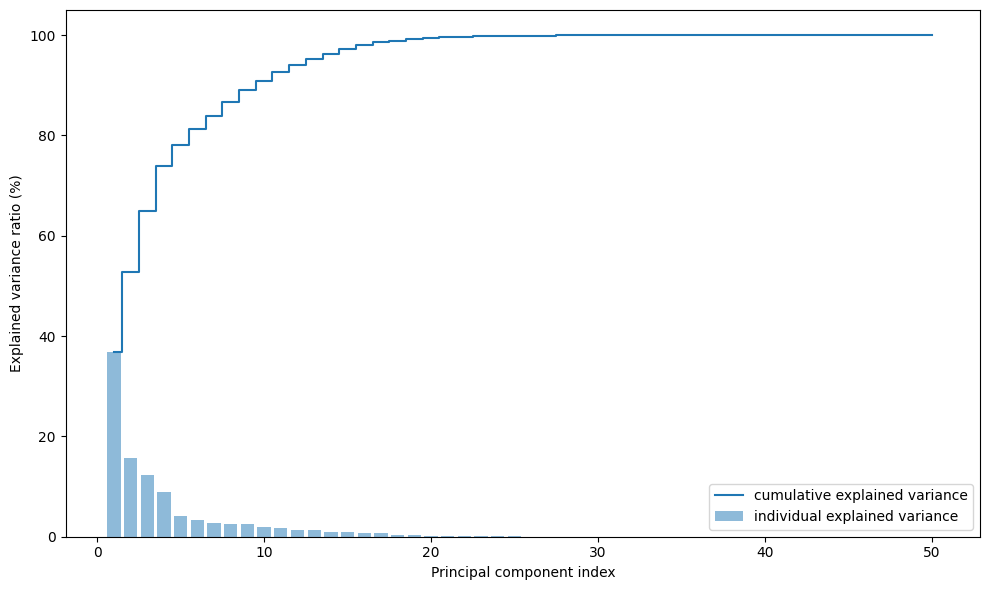

,Principal Component,Explained Variance (%)
0,1,3.690854e+01
1,2,1.576747e+01
2,3,1.227385e+01
3,4,9.005047e+00
4,5,4.044946e+00
5,6,3.240757e+00
6,7,2.705815e+00
7,8,2.622516e+00
8,9,2.444029e+00
9,10,1.850414e+00


In [51]:
# Applying PCA again
pca = PCA()
pca.fit(correlation_df)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio * 100, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance * 100, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio (%)')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()

# Display the plot
plt.show()

# Create a dataframe with the explained variance percentage
explained_variance_df = pd.DataFrame({
    'Principal Component': range(1, len(explained_variance_ratio) + 1),
    'Explained Variance (%)': explained_variance_ratio * 100
})

explained_variance_df


The first six directions are capable of explaining 80% of the statistical variance. Therefore, simpler models can be obtained through linear regressions with a prior PCA.

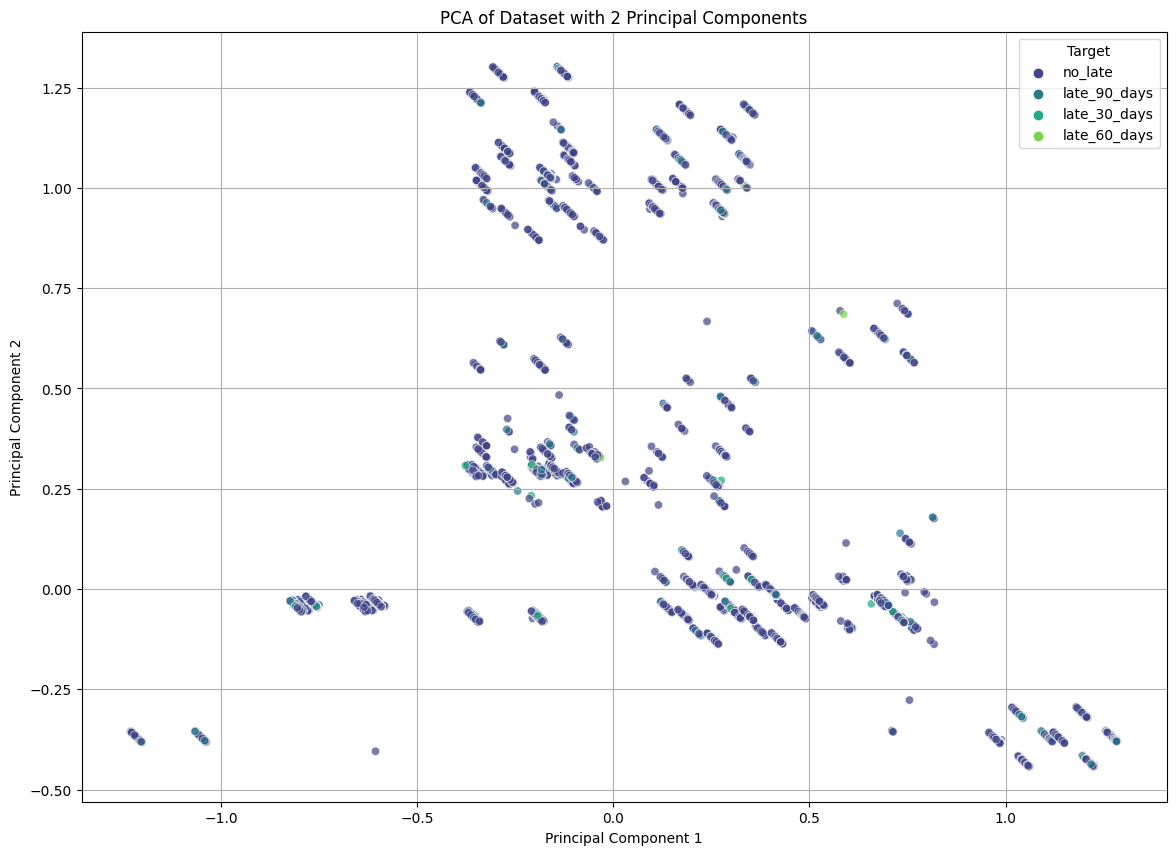

In [52]:
# Dropping the ID column and the target columns for the PCA study
columns_to_drop = ['analytics_matchkey', 'target']
correlation_df_clean = df.drop(columns=columns_to_drop).dropna()

# Applying PCA to reduce the dataset to 2 dimensions
pca_2d = PCA(n_components=2)
pca_2d_result = pca_2d.fit_transform(correlation_df_clean)

# Creating a DataFrame with the PCA results
pca_2d_df = pd.DataFrame(pca_2d_result, columns=['PC1', 'PC2'])

# Adding the target column to color the points
pca_2d_df['target'] = df.loc[correlation_df_clean.index, 'target']

# Plotting the PCA results
plt.figure(figsize=(14, 10))
sns.scatterplot(data=pca_2d_df, x='PC1', y='PC2', hue='target', palette='viridis', alpha=0.7)
plt.title('PCA of Dataset with 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target')
plt.grid(True)
plt.show()


There is not possible separate the different groups with only 2 PC axis.